*[Notebook is based on the code from the chapter 2 of the book](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb)*  
Text from the book is omitted in this notebook. Please the link ☝ to read the book's content.

In [1]:
import os
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [18]:
def get_images(root_path: Path) -> Path:
    return get_files(path=root_path, extensions={".jpg"}, recurse=True)

dataset_path = Path("../models/chapter2/bears/data").absolute()
fns = get_images(dataset_path)
failed = verify_images(fns)
failed

(#0) []

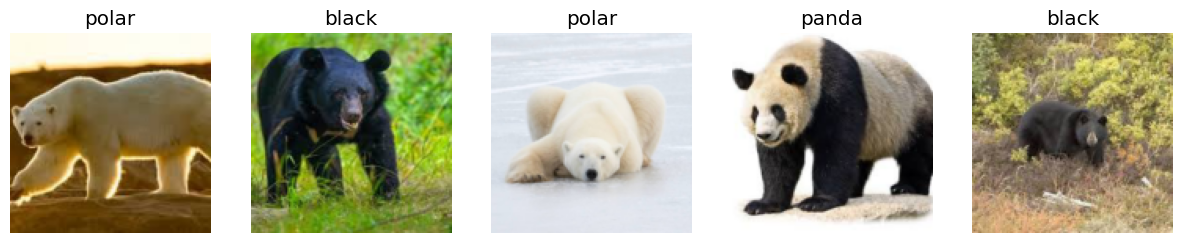

In [22]:
bears_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_images, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = bears.dataloaders(dataset_path)
dls.valid.show_batch(max_n=5, nrows=1)
